In [1]:
import os
import argparse

import numpy as np
import pandas as pd
import cv2
import random
import math

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Lambda
from keras.layers.convolutional import Conv2D, Cropping2D
from keras.backend import tf as ktf

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline

Using TensorFlow backend.


In [2]:
def read_data_csv(filename):
    columns = ('center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed')
    df = pd.read_csv(filename, skipinitialspace = True)
    df.columns = columns
    return df

'''
Change the image path as path of images in csv file different from actual images path
'''
def change_image_path(df, folder):
    new_filepath = lambda s: os.path.join(folder, s.split('/')[-1])
    df['center'] = df['center'].map(new_filepath)
    df['left'] = df['left'].map(new_filepath)
    df['right'] = df['right'].map(new_filepath)
    return df

# load image from file in HSV color space
def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def get_input_shape(df):
    if (df is not None and df['center'] is not None):
        sample_input_image = df['center'].iloc[1]
        return load_image(sample_input_image).shape
    

def read_all_csvs_folders(parent_folder):
    data = []
    folders = os.listdir(parent_folder)
    print(folders)
    for folder in folders:
        if ('.' in folder):
            continue
        folder = os.path.join(parent_folder, folder)
        img_folder_path = os.path.join(folder, "IMG")
        csv_filepath = os.path.join(folder , "driving_log.csv")
        print (csv_filepath)
        df = read_data_csv(csv_filepath)
        df = change_image_path(df, img_folder_path)
        data.append(df)
        concatenate_df = pd.DataFrame(np.concatenate(data, axis=0), columns = df.columns)
        return concatenate_df


data = read_all_csvs_folders('NormanDataset')
#input_shape = get_input_shape(data)
FIGSIZE = (20, 5)

['.DS_Store', 'recordings', 'recovery', 'udacity']
NormanDataset/recordings/driving_log.csv


In [3]:
print ("{} centre images".format(len(data)))
#print ("Shape of each image is {}".format(input_shape))

3737 centre images


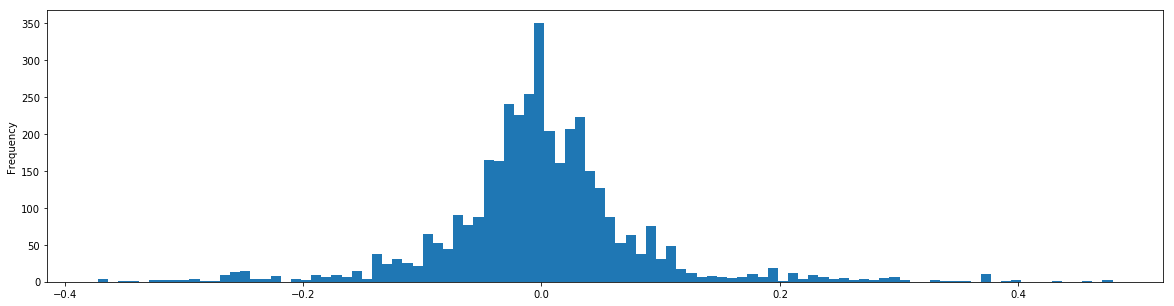

In [9]:
data['steering'].plot.hist(bins = 100, figsize = FIGSIZE)

In [5]:
## Visualize the final model
model = Sequential()
model.add(Cropping2D(cropping=((60,24), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x:x/255.0 - 0.5))
model.add(Conv2D(24, (5,5), strides=(2,2), padding='valid', activation='elu'))
#model.add(Dropout(0.25))
model.add(Conv2D(36, (5,5), strides=(2,2), padding='valid', activation='elu'))
#model.add(Dropout(0.5))
model.add(Conv2D(48, (5,5), strides=(2,2), padding='valid', activation='elu'))
#model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), strides=(1,1), padding='valid', activation='elu'))
model.add(Conv2D(64, (3,3), strides=(1,1), padding='valid', activation='elu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(10 , activation='elu'))
model.add(Dense(1))

In [6]:
from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot

# Show the model in ipython notebook
#figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
#display(figure)

In [7]:
# Save the model as png file
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)